# ANXIETY EMOTIONS😰

#### Anxiety refers to an overwhelming feeling of fear and unease that can interfere with one's day-to-day activities. According to the databooks page(2022), anxiety and social anxiety are the most common mental health issues experienced by teenagers.

![image-2.png](https://pbs.twimg.com/media/D3xtIS-X4AAyWo3.png)


reference :
https://databoks.katadata.co.id/index.php/datapublish/2023/04/14/jutaan-remaja-indonesia-disebut-terdiagnosis-gangguan-kesehatan-mental-ini-jenisnya
https://pbs.twimg.com/media/D3xtIS-X4AAyWo3.png

## Import Raw Data

In [22]:
import pandas as pd

rawdata = pd.read_csv('raw_data.csv')
rawdata.head()

,Unnamed: 0,user,date_created,tweet
0,0,Daanntee,2023-01-09 23:59:14+00:00,"dah la single, introvert, ada social anxiety l..."
1,1,deepmeter,2023-01-09 23:56:41+00:00,"bohong anjing, ini anxiety gue tiba-tiba dateng."
2,2,sofiashrn,2023-01-09 23:52:14+00:00,diketawain abi karna dah dua hari nglike in ak...
3,3,teasandyou,2023-01-09 23:46:08+00:00,"@Gyurismilee @Askrlfess Kak, ansos sama social..."
4,4,ateynteyn,2023-01-09 23:05:58+00:00,Bangun pagi terus anxiety. Calculation ada sal...


In [23]:
rawdata.info() #check if any null columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    10001 non-null  int64 
 1   user          10001 non-null  object
 2   date_created  10001 non-null  object
 3   tweet         10001 non-null  object
dtypes: int64(1), object(3)
memory usage: 312.7+ KB


In [24]:
rawdata['date_created'] = pd.to_datetime(rawdata['date_created']).dt.strftime('%Y-%m-%d') #change date format in date_created column
rawdata.head()

,Unnamed: 0,user,date_created,tweet
0,0,Daanntee,2023-01-09,"dah la single, introvert, ada social anxiety l..."
1,1,deepmeter,2023-01-09,"bohong anjing, ini anxiety gue tiba-tiba dateng."
2,2,sofiashrn,2023-01-09,diketawain abi karna dah dua hari nglike in ak...
3,3,teasandyou,2023-01-09,"@Gyurismilee @Askrlfess Kak, ansos sama social..."
4,4,ateynteyn,2023-01-09,Bangun pagi terus anxiety. Calculation ada sal...


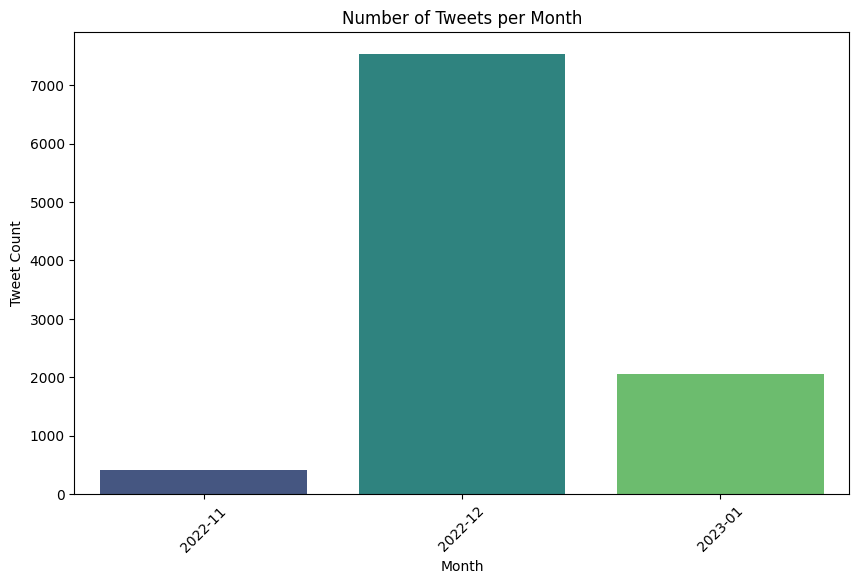

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract month and year from the 'date_created' column
rawdata['month_year'] = rawdata['date_created'].dt.to_period('M')

# Group by month and count the number of tweets
monthly_tweet_count = rawdata.groupby('month_year').size().reset_index(name='tweet')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='month_year', y='tweet', data=monthly_tweet_count, palette='viridis')
plt.title('Number of Tweets per Month')
plt.xlabel('Month')
plt.ylabel('Tweet Count')
plt.xticks(rotation=45)
plt.show()


## Tweet selection based on 'Indonesian lang'

In [30]:
import pandas as pd

def is_indonesian(tweet):
    lang, _ = langid.classify(tweet)
    return lang == "id"

# Add a new column 'is_indonesian' with True/False based on the language
rawdata['is_indonesian'] = rawdata['tweet'].apply(is_indonesian)

# Filter the DataFrame to keep only the rows where 'is_indonesian' is True
rawdata = rawdata[rawdata['is_indonesian']]

# Drop the 'is_indonesian' column because don't need it anymore
rawdata = rawdata.drop(columns=['is_indonesian'])

rawdata.head()


,Unnamed: 0,user,date_created,tweet,month_year
1,1,deepmeter,2023-01-09,"bohong anjing, ini anxiety gue tiba-tiba dateng.",2023-01
4,4,ateynteyn,2023-01-09,Bangun pagi terus anxiety. Calculation ada sal...,2023-01
5,5,rafurace,2023-01-09,pas belom jadian aja bapaknya dah ngechat di f...,2023-01
6,6,Isi_Pikiran_,2023-01-09,Ga enak pnya anxiety\nSuka tremor sendiri it g...,2023-01
7,7,akusipemaluu,2023-01-09,Apaan bgt tugas ips disuruh drama depan org ba...,2023-01


### Make plot again to make sure if there is different value or not

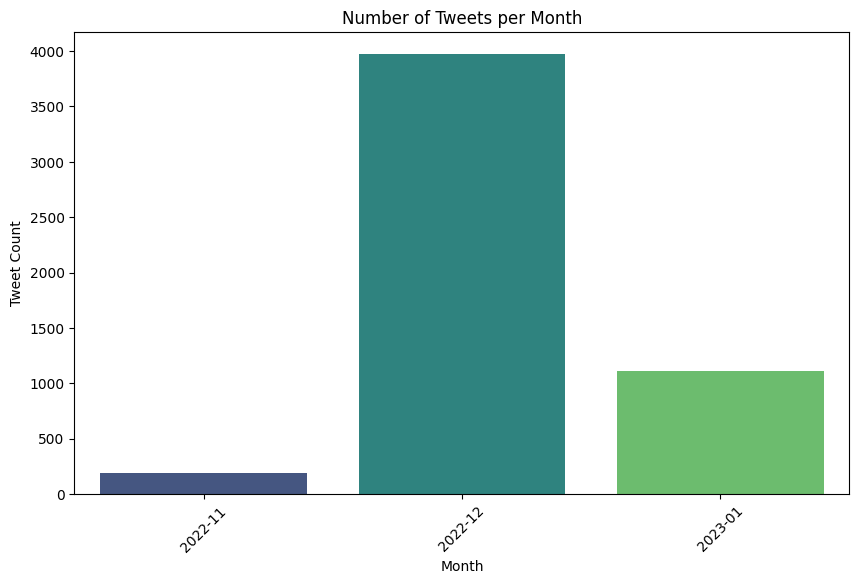

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'date_created' to datetime format
rawdata['date_created'] = pd.to_datetime(rawdata['date_created'])

# Extract month and year from the 'date_created' column
rawdata['month_year'] = rawdata['date_created'].dt.to_period('M')

# Group by month and count the number of tweets
monthly_tweet_count = rawdata.groupby('month_year').size().reset_index(name='tweet')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='month_year', y='tweet', data=monthly_tweet_count, palette='viridis')
plt.title('Number of Tweets per Month')
plt.xlabel('Month')
plt.ylabel('Tweet Count')
plt.xticks(rotation=45)
plt.show()


#### look like there is no different after all. Just Y axis 'Tweet Count' is less than plot before which actually there are 10K data and at the last month of 2022 is the top highest tweet about 'anxiety'.

## Data Preprocessing

### Lowering and cleaning data

In [34]:
import re
import string

def cleansing(tweet):
    tweet = tweet.strip(" ")
    tweet = tweet.encode('ascii', 'replace').decode('ascii')
    tweet = re.sub(r'https?:\/\/.*\/\w*','', tweet)
    tweet = re.sub(r'[?|$|.|!_:")(-+,]', '', tweet)
    tweet = re.sub(r'\d+', '', tweet)
    tweet = re.sub(r"\b[a-zA-Z]\b", "", tweet)
    tweet = re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", tweet)
    tweet = re.sub('\s+',' ', tweet)
    return tweet
rawdata['tweet'] = rawdata['tweet'].str.lower().apply(cleansing)
rawdata.head()

,Unnamed: 0,user,date_created,tweet,month_year
1,1,deepmeter,2023-01-09,bohong anjing ini anxiety gue tiba-tiba dateng,2023-01
4,4,ateynteyn,2023-01-09,bangun pagi terus anxiety calculation ada sala...,2023-01
5,5,rafurace,2023-01-09,pas belom jadian aja bapaknya dah ngechat di f...,2023-01
6,6,Isi_Pikiran_,2023-01-09,ga enak pnya anxiety suka tremor sendiri it ga...,2023-01
7,7,akusipemaluu,2023-01-09,apaan bgt tugas ips disuruh drama depan org ba...,2023-01


### Tokenizing

In [35]:
from nltk.tokenize import word_tokenize

def word_tokenize_wrapper(tweet):
    return word_tokenize(tweet)
rawdata['tweet'] = rawdata['tweet'].apply(word_tokenize_wrapper)
rawdata.head()

,Unnamed: 0,user,date_created,tweet,month_year
1,1,deepmeter,2023-01-09,"[bohong, anjing, ini, anxiety, gue, tiba-tiba,...",2023-01
4,4,ateynteyn,2023-01-09,"[bangun, pagi, terus, anxiety, calculation, ad...",2023-01
5,5,rafurace,2023-01-09,"[pas, belom, jadian, aja, bapaknya, dah, ngech...",2023-01
6,6,Isi_Pikiran_,2023-01-09,"[ga, enak, pnya, anxiety, suka, tremor, sendir...",2023-01
7,7,akusipemaluu,2023-01-09,"[apaan, bgt, tugas, ips, disuruh, drama, depan...",2023-01


### Stopword removal

In [47]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
list_stopwords = stopwords.words('indonesian')
test = " ".join(list_stopwords)

def stopwords_removal(words):
    return [word for word in words if word not in test]

rawdata['cleaned_tweet'] = rawdata['tweet'].apply(stopwords_removal)
rawdata

,Unnamed: 0,user,date_created,tweet,month_year,cleaned_tweet
1,1,deepmeter,2023-01-09,"[bohong, anjing, ini, anxiety, gue, tiba-tiba,...",2023-01,"[bohong, anjing, anxiety, gue, dateng]"
4,4,ateynteyn,2023-01-09,"[bangun, pagi, terus, anxiety, calculation, ad...",2023-01,"[bangun, pagi, anxiety, calculation, sigh]"
5,5,rafurace,2023-01-09,"[pas, belom, jadian, aja, bapaknya, dah, ngech...",2023-01,"[belom, jadian, bapaknya, ngechat, facebook, m..."
6,6,Isi_Pikiran_,2023-01-09,"[ga, enak, pnya, anxiety, suka, tremor, sendir...",2023-01,"[anxiety, suka, tremor, lucu]"
7,7,akusipemaluu,2023-01-09,"[apaan, bgt, tugas, ips, disuruh, drama, depan...",2023-01,"[bgt, tugas, ips, disuruh, drama, org, banyakk..."
...,...,...,...,...,...,...
9989,9989,JPFBASE,2022-11-29,"[jpf, warning, bl, guys, minta, rekomen, anima...",2022-11,"[jpf, warning, bl, guys, rekomen, animanga, ka..."
9992,9992,DeeewaniMastani,2022-11-29,"[anxiety, ki, dukaan, khol, leni, hai, maine, ab]",2022-11,"[anxiety, dukaan, khol, leni, maine]"
9993,9993,SyuhadahMohd___,2022-11-29,"[if, kau, ada, partner, yang, tengah, fight, d...",2022-11,"[if, kau, partner, fight, depression, anxiety,..."
9997,9997,ttasyahmad,2022-11-29,"[pernah, rasa, sedih, sampai, kena, anxiety, t...",2022-11,"[sedih, anxiety, still, diam]"


### Normalizing

In [52]:
normalized_word = pd.read_excel("kamusNormalisasi.xlsx")

normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

rawdata['cleaned_tweet']= rawdata['cleaned_tweet'].apply(normalized_term)

rawdata.head()

,Unnamed: 0,user,date_created,tweet,month_year,cleaned_tweet
1,1,deepmeter,2023-01-09,"[bohong, anjing, ini, anxiety, gue, tiba-tiba,...",2023-01,"[bohong, anjing, anxiety, gue, datang]"
4,4,ateynteyn,2023-01-09,"[bangun, pagi, terus, anxiety, calculation, ad...",2023-01,"[bangun, pagi, anxiety, calculation, sigh]"
5,5,rafurace,2023-01-09,"[pas, belom, jadian, aja, bapaknya, dah, ngech...",2023-01,"[belum, jadian, bapaknya, ngechat, facebook, m..."
6,6,Isi_Pikiran_,2023-01-09,"[tidak, enak, pnya, anxiety, suka, tremor, sen...",2023-01,"[anxiety, suka, tremor, lucu]"
7,7,akusipemaluu,2023-01-09,"[apaan, bgt, tugas, ips, disuruh, drama, depan...",2023-01,"[banget, tugas, ips, disuruh, drama, org, bany..."


### Stemming

In [54]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

rawdata['cleaned_tweet'] = rawdata['cleaned_tweet'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x]))
rawdata

,Unnamed: 0,user,date_created,tweet,month_year,cleaned_tweet
1,1,deepmeter,2023-01-09,"[bohong, anjing, ini, anxiety, gue, tiba-tiba,...",2023-01,bohong anjing anxiety gue datang
4,4,ateynteyn,2023-01-09,"[bangun, pagi, terus, anxiety, calculation, ad...",2023-01,bangun pagi anxiety calculation sigh
5,5,rafurace,2023-01-09,"[pas, belom, jadian, aja, bapaknya, dah, ngech...",2023-01,belum jadi bapak ngechat facebook dadak anxiet...
6,6,Isi_Pikiran_,2023-01-09,"[tidak, enak, pnya, anxiety, suka, tremor, sen...",2023-01,anxiety suka tremor lucu
7,7,akusipemaluu,2023-01-09,"[apaan, bgt, tugas, ips, disuruh, drama, depan...",2023-01,banget tugas ips suruh drama org banyakkk cukk...
...,...,...,...,...,...,...
9989,9989,JPFBASE,2022-11-29,"[jpf, warning, bl, guys, minta, rekomen, anima...",2022-11,jpf warning bl guys rekomen animanga karakter ...
9992,9992,DeeewaniMastani,2022-11-29,"[anxiety, ki, dukaan, khol, leni, hai, maine, ab]",2022-11,anxiety duka khol leni maine
9993,9993,SyuhadahMohd___,2022-11-29,"[if, kau, ada, partner, yang, tengah, fight, d...",2022-11,if kau partner fight depression anxiety orang ...
9997,9997,ttasyahmad,2022-11-29,"[pernah, rasa, sedih, sampai, kena, anxiety, t...",2022-11,sedih anxiety still diam


In [56]:
rawdata.to_csv('data_stemming.csv') #save as csv file

## Perform K-Fold n= 5 Cross Validation

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(kfold.split(rawdata['cleaned_tweet'])):
    X_train, X_test = rawdata['cleaned_tweet'].iloc[train_idx], rawdata['cleaned_tweet'].iloc[test_idx]
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)
    
    print(f"Fold {fold + 1} - Train set shape: {X_train_tfidf.shape}, Test set shape: {X_test_tfidf.shape}")

Fold 1 - Train set shape: (4218, 10764), Test set shape: (1055, 10764)
Fold 2 - Train set shape: (4218, 10824), Test set shape: (1055, 10824)
Fold 3 - Train set shape: (4218, 10775), Test set shape: (1055, 10775)
Fold 4 - Train set shape: (4219, 10739), Test set shape: (1054, 10739)
Fold 5 - Train set shape: (4219, 10606), Test set shape: (1054, 10606)


## Labelling data based on each emotion

#### Note : there are still many shortcomings in this classification of emotions. It just for simple case.

In [120]:
rawdata['emotion'] = 'neutral'

emotion_rules = [
    ('happy', ['happy', 'senang', 'alhamdulillah', 'gembira', 'bahagia', 'syukur', 'buku', 'movie']),
    ('hope', ['sembuh', 'allah', 'kuat', 'moga', 'bisa']),
    ('fear', ['sakit', 'belum', 'takut', 'tidur', 'tremor', 'deg', 'maag', 'gerd', 'nangis', 'anxiety', 'datang', 'social', 'bangun', 'panik', 'attack']),
    ('anger', ['bohong', '******', '****', 'anxiety']),
    ('sad', ['sedih', 'kambuh', 'nangis', 'anxiety', 'linglung'])
]

for emotion, keywords in emotion_rules:
    mask = rawdata['cleaned_tweet'].str.contains('|'.join(keywords), case=False)
    rawdata.loc[mask & (rawdata['emotion'] == 'neutral'), 'emotion'] = emotion

filtered_data = rawdata[rawdata['emotion'] == 'sad']
filtered_data

,Unnamed: 0,user,date_created,tweet,month_year,cleaned_tweet,emotion
4287,50,ddiverrein,2022-12-23,"[sedih, sih, punya, anxety, kadang, gue, keban...",2022-12,sedih anxety kadang gue banyak mikir nilai gim...,sad


## Train model using SVM with K-Fold n = 5

In [96]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

X = rawdata['cleaned_tweet']
y = rawdata['emotion']

tfidf_vectorizer = TfidfVectorizer()

# Initialize SVM classifier
svm_classifier = SVC()

# Initialize StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []
classification_reports = []

# Perform 5-fold cross-validation
for fold, (train_index, test_index) in enumerate(kfold.split(X, y), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Transform text data to TF-IDF features
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    # Train SVM classifier
    svm_classifier.fit(X_train_tfidf, y_train)
    predictions = svm_classifier.predict(X_test_tfidf)

    # Evaluate performance
    accuracy = accuracy_score(y_test, predictions)
    classification = classification_report(y_test, predictions)
    accuracy_scores.append(accuracy)
    classification_reports.append(classification)

    print(f"Fold {fold} - Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{classification}\n")

# The average results across all folds
print(f"Average Accuracy: {sum(accuracy_scores) / len(accuracy_scores):.4f}")


C:\Users\meili\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels

Fold 1 - Accuracy: 0.8986
Classification Report:
              precision    recall  f1-score   support

        fear       0.90      1.00      0.95       904
       happy       1.00      0.14      0.24        51
        hope       0.90      0.45      0.60        83
     neutral       0.00      0.00      0.00        17

    accuracy                           0.90      1055
   macro avg       0.70      0.40      0.45      1055
weighted avg       0.89      0.90      0.87      1055




C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 2 - Accuracy: 0.8891
Classification Report:
              precision    recall  f1-score   support

        fear       0.89      1.00      0.94       904
       happy       1.00      0.18      0.31        50
        hope       0.96      0.30      0.46        83
     neutral       0.00      0.00      0.00        17
         sad       0.00      0.00      0.00         1

    accuracy                           0.89      1055
   macro avg       0.57      0.30      0.34      1055
weighted avg       0.88      0.89      0.86      1055




C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 3 - Accuracy: 0.9014
Classification Report:
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00         1
        fear       0.90      1.00      0.95       904
       happy       1.00      0.20      0.33        50
        hope       0.97      0.45      0.61        83
     neutral       0.00      0.00      0.00        17

    accuracy                           0.90      1055
   macro avg       0.57      0.33      0.38      1055
weighted avg       0.89      0.90      0.87      1055




C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 4 - Accuracy: 0.9042
Classification Report:
              precision    recall  f1-score   support

        fear       0.90      1.00      0.95       903
       happy       1.00      0.22      0.35        51
        hope       1.00      0.47      0.64        83
     neutral       0.00      0.00      0.00        17

    accuracy                           0.90      1054
   macro avg       0.72      0.42      0.49      1054
weighted avg       0.90      0.90      0.88      1054


Fold 5 - Accuracy: 0.9080
Classification Report:
              precision    recall  f1-score   support

        fear       0.90      1.00      0.95       903
       happy       1.00      0.24      0.38        51
        hope       0.95      0.51      0.66        83
     neutral       0.00      0.00      0.00        17

    accuracy                           0.91      1054
   macro avg       0.71      0.44      0.50      1054
weighted avg       0.90      0.91      0.88      1054


Average Accuracy: 0.9002


C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Visualize accuracy for each fold in a bar chart (n=5)

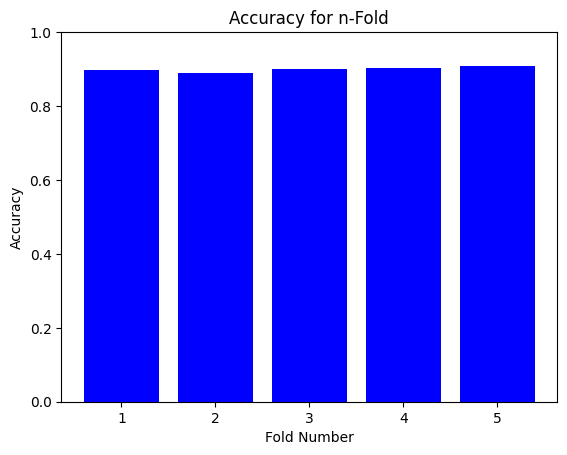

In [100]:
import matplotlib.pyplot as plt
import numpy as np

fold_numbers = np.arange(1, 6)
plt.bar(fold_numbers, fold_accuracies, color='blue')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('Accuracy for n-Fold')
plt.ylim(0, 1)
plt.show()


## Train model using SVM with K-Fold n = 10

In [105]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

X = rawdata['cleaned_tweet']
y = rawdata['emotion']

tfidf_vectorizer = TfidfVectorizer()

svm_classifier = SVC()

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracy_scores = []
classification_reports = []

for fold, (train_index, test_index) in enumerate(kfold.split(X, y), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    svm_classifier.fit(X_train_tfidf, y_train)
    predictions = svm_classifier.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, predictions)
    classification = classification_report(y_test, predictions)
    accuracy_scores.append(accuracy)
    classification_reports.append(classification)

    print(f"Fold {fold} - Accuracy: {accuracy:.9f}")
    print(f"Classification Report:\n{classification}\n")

print(f"Average Accuracy: {sum(accuracy_scores) / len(accuracy_scores):.9f}")

C:\Users\meili\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in label

Fold 1 - Accuracy: 0.897727273
Classification Report:
              precision    recall  f1-score   support

        fear       0.90      1.00      0.95       452
       happy       1.00      0.15      0.27        26
        hope       0.90      0.43      0.58        42
     neutral       0.00      0.00      0.00         8

    accuracy                           0.90       528
   macro avg       0.70      0.40      0.45       528
weighted avg       0.89      0.90      0.87       528




C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 2 - Accuracy: 0.903409091
Classification Report:
              precision    recall  f1-score   support

        fear       0.90      1.00      0.95       452
       happy       1.00      0.20      0.33        25
        hope       0.91      0.48      0.62        42
     neutral       0.00      0.00      0.00         8
         sad       0.00      0.00      0.00         1

    accuracy                           0.90       528
   macro avg       0.56      0.34      0.38       528
weighted avg       0.89      0.90      0.88       528




C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 3 - Accuracy: 0.895833333
Classification Report:
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00         1
        fear       0.89      1.00      0.94       452
       happy       1.00      0.20      0.33        25
        hope       0.94      0.38      0.54        42
     neutral       0.00      0.00      0.00         8

    accuracy                           0.90       528
   macro avg       0.57      0.32      0.36       528
weighted avg       0.89      0.90      0.87       528




C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 4 - Accuracy: 0.891840607
Classification Report:
              precision    recall  f1-score   support

        fear       0.89      1.00      0.94       452
       happy       1.00      0.24      0.39        25
        hope       1.00      0.29      0.45        41
     neutral       0.00      0.00      0.00         9

    accuracy                           0.89       527
   macro avg       0.72      0.38      0.45       527
weighted avg       0.89      0.89      0.86       527




C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 5 - Accuracy: 0.912713472
Classification Report:
              precision    recall  f1-score   support

        fear       0.91      1.00      0.95       452
       happy       1.00      0.24      0.39        25
        hope       0.96      0.56      0.71        41
     neutral       0.00      0.00      0.00         9

    accuracy                           0.91       527
   macro avg       0.72      0.45      0.51       527
weighted avg       0.90      0.91      0.89       527




C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 6 - Accuracy: 0.895635674
Classification Report:
              precision    recall  f1-score   support

        fear       0.89      1.00      0.94       452
       happy       1.00      0.16      0.28        25
        hope       1.00      0.39      0.56        41
     neutral       0.00      0.00      0.00         9

    accuracy                           0.90       527
   macro avg       0.72      0.39      0.44       527
weighted avg       0.89      0.90      0.87       527




C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 7 - Accuracy: 0.912713472
Classification Report:
              precision    recall  f1-score   support

        fear       0.91      1.00      0.95       452
       happy       1.00      0.32      0.48        25
        hope       0.95      0.51      0.67        41
     neutral       0.00      0.00      0.00         9

    accuracy                           0.91       527
   macro avg       0.72      0.46      0.53       527
weighted avg       0.90      0.91      0.89       527




C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 8 - Accuracy: 0.903225806
Classification Report:
              precision    recall  f1-score   support

        fear       0.90      1.00      0.95       452
       happy       1.00      0.24      0.39        25
        hope       1.00      0.44      0.61        41
     neutral       0.00      0.00      0.00         9

    accuracy                           0.90       527
   macro avg       0.72      0.42      0.49       527
weighted avg       0.90      0.90      0.88       527




C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\meili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 9 - Accuracy: 0.918406072
Classification Report:
              precision    recall  f1-score   support

        fear       0.91      1.00      0.96       451
       happy       1.00      0.42      0.59        26
        hope       0.96      0.52      0.68        42
     neutral       0.00      0.00      0.00         8

    accuracy                           0.92       527
   macro avg       0.72      0.49      0.56       527
weighted avg       0.91      0.92      0.90       527


Fold 10 - Accuracy: 0.910815939
Classification Report:
              precision    recall  f1-score   support

        fear       0.91      1.00      0.95       451
       happy       1.00      0.19      0.32        26
        hope       1.00      0.55      0.71        42
     neutral       1.00      0.12      0.22         8

    accuracy                           0.91       527
   macro avg       0.98      0.47      0.55       527
weighted avg       0.92      0.91      0.89       527


Average Accuracy: 0

## Visualize accuracy for each fold in a bar chart (n=10)

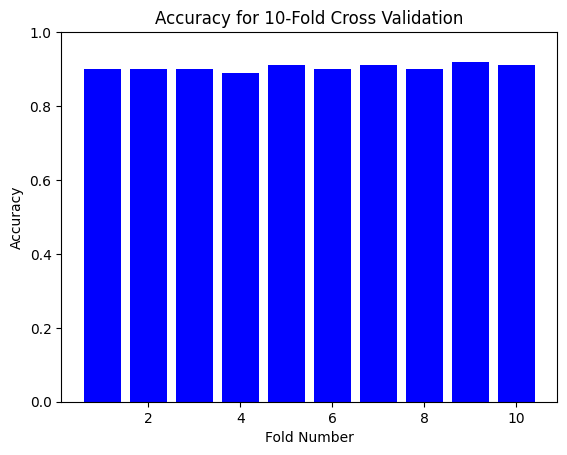

In [113]:
accuracy_scores = [0.90, 0.90, 0.90, 0.89, 0.91, 0.90, 0.91, 0.90, 0.92, 0.91]

fold_numbers = np.arange(1, len(accuracy_scores) + 1)

plt.bar(fold_numbers, accuracy_scores, color='blue')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('Accuracy for 10-Fold Cross Validation')
plt.ylim(0, 1)
plt.show()

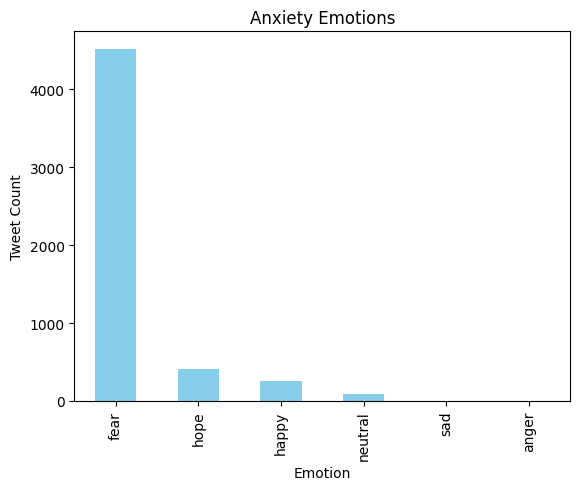

In [122]:
emotion_counts = rawdata['emotion'].value_counts()
emotion_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Emotion')
plt.ylabel('Tweet Count')
plt.title('Anxiety Emotions')
plt.show()

In [123]:
rawdata.to_csv('labelled_data_with_emotions.csv')

In [14]:
import pandas as pd

labelled_data = pd.read_csv("labelled_data_with_emotions.csv")

## Wordcloud

In [18]:
import sys
import matplotlib.pyplot as plt
from os import path
from PIL import Image
import numpy as np
from wordcloud import WordCloud
from nltk.corpus import stopwords

d = path.dirname(sys.argv[0])

def plot_wordCloud(words):
    wordCloud = WordCloud(background_color='white', random_state=21, max_font_size=120).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')

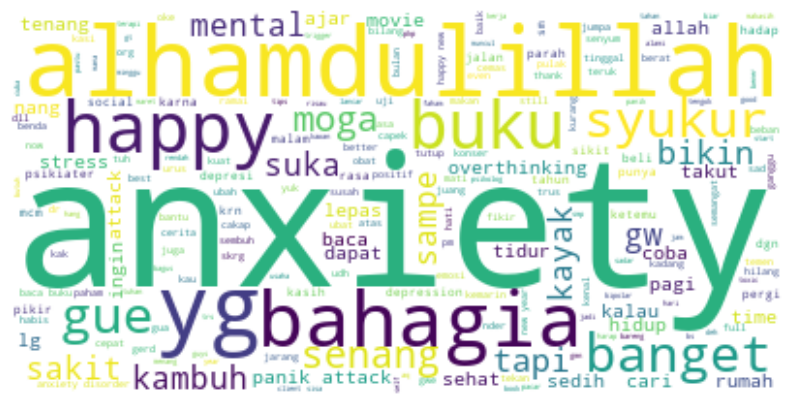

In [29]:
normal_words = ' '.join(text for text in labelled_data['cleaned_tweet'][labelled_data['emotion'] == 'happy']) 
plot_wordCloud(normal_words)

## Word Frequency

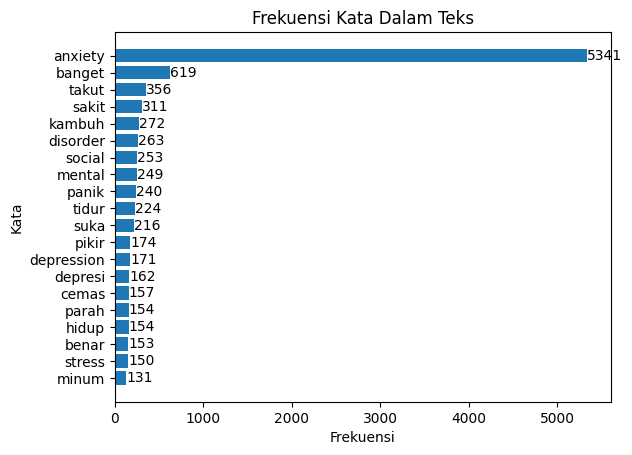

In [38]:
stop_words = ['dan', 'tapi', 'lihat', 'yg']

word_counts = labelled_data['cleaned_tweet'].str.lower().str.split().explode().value_counts()

word_counts = word_counts.drop(labels=stop_words, errors='ignore')

plt.barh(word_counts.index[:20], word_counts[:20])

for i, count in enumerate(word_counts[:20]):
    plt.text(count, i, str(count), ha='left', va='center')

plt.gca().invert_yaxis()
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.title('Frekuensi Kata Dalam Teks')
plt.show()